<img src="http://hilpisch.com/tpq_logo.png" width="36%" align="right" style="vertical-align: top;">

# Natural Language Processing

**Basic Techniques and Algorithms**

_Illustrated based on the texts from three Apple press releases._

Dr Yves J Hilpisch | Michael Schwed

The Python Quants GmbH

## Data Retrieval

In [1]:
import requests

In [2]:
sources = [
    'https://nr.apple.com/dE0b1T5G3u',  # iPad Pro
    'https://nr.apple.com/dE4c7T6g1K',  # MacBook Air
    'https://nr.apple.com/dE4q4r8A2A',  # Mac Mini
]  

In [3]:
html = [requests.get(url).text for url in sources]  

## Preprocessing

In [4]:
import sys
sys.path.append('../../modules/')
import nlp_functions as nlp  

In [5]:
data = [nlp.clean_up_text(t) for t in html]  

In [6]:
data[0][:500]  

'new ipad pro with all-screen designis most advanced, powerful ipad ever - apple open menu close menu apple shopping bag search apple.com cancel apple mac ipad iphone watch tv music support shopping bag newsroom open menu close menu archive press release october 30, 2018 new ipad pro with all-screen designis most advanced, powerful ipad ever 11-inch and 12.9-inch models feature liquid retina display, powerful a12x bionic chip and face id introducing the new ipad pro with all-screen design and nex'

## Basic Text Analysis

In [7]:
import nltk

In [8]:
nltk.__version__

'3.2.5'

In [9]:
# to be executed once
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

### Basic Tokenization and Vocabulary

In [10]:
t = 'A sentence about NLP; and about ML.'

In [11]:
nltk.word_tokenize(t)

['A', 'sentence', 'about', 'NLP', ';', 'and', 'about', 'ML', '.']

In [12]:
nltk.word_tokenize(data[0])[:10]  

['new',
 'ipad',
 'pro',
 'with',
 'all-screen',
 'designis',
 'most',
 'advanced',
 ',',
 'powerful']

In [13]:
tokens = nltk.word_tokenize(' '.join(data))  

In [14]:
text = nltk.Text(tokens)  

In [15]:
text.count('ipad')  

93

In [16]:
text.count('mojave')  

9

In [17]:
text.collocations()  

ipad pro; macbook air; mac mini; close menu; menu close; open menu;
smart keyboard; keyboard folio; retina display; a12x bionic; macos
mojave; security chip; battery life; apple pencil; liquid retina;
apple store; first time; shopping bag; five times; space gray


In [18]:
text.similar('performance')  

memory a wireless more viewer efficiency other latest


In [19]:
text.common_contexts(['ipad', 'macbook'])  

new_pro to_pro for_pro


In [20]:
text.vocab()  

FreqDist({'new': 99,
          'ipad': 93,
          'pro': 73,
          'with': 85,
          'all-screen': 6,
          'designis': 3,
          'most': 23,
          'advanced': 13,
          ',': 344,
          'powerful': 19,
          'ever': 21,
          '-': 3,
          'apple': 138,
          'open': 27,
          'menu': 54,
          'close': 27,
          'shopping': 9,
          'bag': 6,
          'search': 3,
          'apple.com': 19,
          'cancel': 3,
          'mac': 58,
          'iphone': 13,
          'watch': 9,
          'tv': 9,
          'music': 11,
          'support': 12,
          'newsroom': 12,
          'archive': 3,
          'press': 6,
          'release': 3,
          'october': 5,
          '30': 6,
          '2018': 9,
          '11-inch': 9,
          'and': 253,
          '12.9-inch': 9,
          'models': 5,
          'feature': 3,
          'liquid': 7,
          'retina': 13,
          'display': 20,
          'a12x': 8,
          'bi

In [21]:
text.concordance('macbook', width=70, lines=7)

Displaying 7 of 45 matches:
refunds legal site map all-new macbook air takes flight - apple open 
acbookair takes flight all-new macbook air features 13-inch retina di
le today introduced an all-new macbook air , bringing a stunning 13-i
y life its known for , the new macbook air is available in three gorg
thunderbolt 3 , making the new macbook air the perfect notebook to ta
 everywhere you go . the first macbook air revolutionized mac with it
ldwide marketing . redesigning macbook air started with a stunning re


In [22]:
text.concordance('mojave', width=70, lines=7)

Displaying 7 of 9 matches:
t 3 ports , and of course macos mojave in a beautiful , thinner , ligh
ion so text and images in macos mojave look sharp and stunning . and w
and rendering workloads.1 macos mojave all new macs come with macos mo
ve all new macs come with macos mojave , the latest version of the wor
esigned for everyone . in macos mojave , a new dark mode transforms th
be . macbook air includes macos mojave , featuring dark mode , stacks 
roadest mac lineup ever . macos mojave all new macs come with macos mo


In [23]:
words = sorted(set([w.lower() for w in tokens]))  

In [24]:
len(words)  

1230

In [25]:
words[:7]  

['$', '(', ')', '+', ',', '-', '.']

### Improved Tokenization and Vocabulary

In [26]:
t = 'A sentence about NLP; and about ML.'

In [27]:
tokens = nlp.tokenize(t, min_char=3)
tokens

['sentence', 'NLP']

In [28]:
%time tokens = nlp.tokenize(' '.join(data))  

CPU times: user 68.8 ms, sys: 0 ns, total: 68.8 ms
Wall time: 67.8 ms


In [29]:
tokens[:7]  

['ipad', 'all-screen', 'designis', 'advance', 'powerful', 'ipad', 'ever']

In [30]:
words = sorted(set([w.lower() for w in tokens]))  

In [31]:
len(words)  

997

In [32]:
words[:6]  

['.61', '1,149', '1,199', '1-800-my-apple', '1.5tb', '1.6ghz']

## Similarity

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
ts = [
    'A sentence about NLP; and about ML.',
    'Another one about NLP and algorithms.',
    'A text fragment about Apple.'
]  

In [35]:
vec = TfidfVectorizer(stop_words='english')  

In [36]:
mat = vec.fit_transform(ts)  

In [37]:
mat.A.round(3)  

array([[0.   , 0.   , 0.   , 0.623, 0.474, 0.623, 0.   ],
       [0.796, 0.   , 0.   , 0.   , 0.605, 0.   , 0.   ],
       [0.   , 0.577, 0.577, 0.   , 0.   , 0.   , 0.577]])

In [38]:
df = pd.DataFrame(mat.A, columns=vec.get_feature_names())  

In [39]:
df.round(3)  

,algorithms,apple,fragment,ml,nlp,sentence,text
0,0.000,0.000,0.000,0.623,0.474,0.623,0.000
1,0.796,0.000,0.000,0.000,0.605,0.000,0.000
2,0.000,0.577,0.577,0.000,0.000,0.000,0.577


In [40]:
(mat * mat.T).A  

array([[1.        , 0.28671097, 0.        ],
       [0.28671097, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [41]:
tl = [' '.join(nlp.tokenize(t)) for t in data]  

In [42]:
mat = vec.fit_transform(tl)  
mat  

<3x902 sparse matrix of type '<class 'numpy.float64'>'
	with 1514 stored elements in Compressed Sparse Row format>

In [43]:
sm = (mat * mat.T).A  
sm  

array([[1.        , 0.40518205, 0.34496952],
       [0.40518205, 1.        , 0.47562226],
       [0.34496952, 0.47562226, 1.        ]])

In [44]:
prs = ['ipad', 'air', 'mini']  

In [45]:
df = pd.DataFrame(sm, index=prs, columns=prs)  

In [46]:
df  

,ipad,air,mini
ipad,1.000000,0.405182,0.344970
air,0.405182,1.000000,0.475622
mini,0.344970,0.475622,1.000000


## Word Clouds

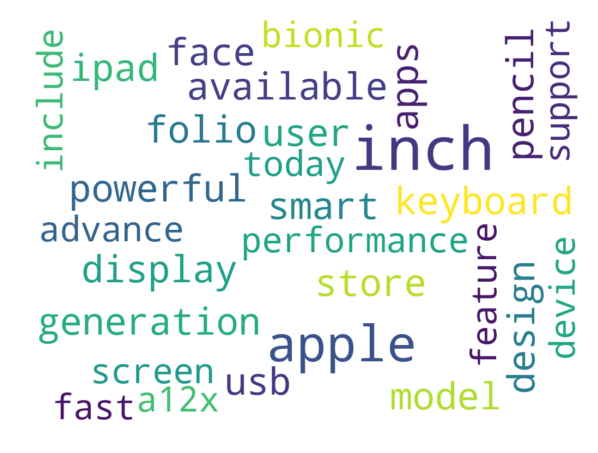

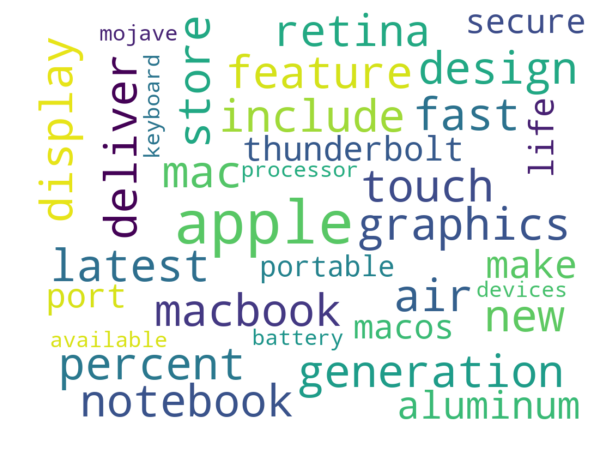

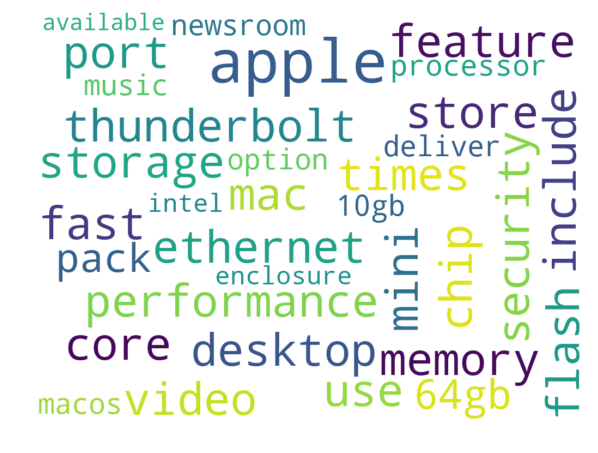

In [47]:
for name, text in zip(prs, data):  
    nlp.generate_word_cloud(text, 35)#,
           # name='../../images/wc_{}.png'.format(name))  

## Topic Modeling

### NMF Clustering

In [48]:
from sklearn.decomposition import NMF

In [49]:
vec = TfidfVectorizer(stop_words='english')  

In [50]:
mat = vec.fit_transform(data)  

In [51]:
nmf = NMF(n_components=len(data))  

In [52]:
nmf.fit(mat)  

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=3, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [53]:
nmf.components_.round(3)

array([[0.011, 0.014, 0.   , ..., 0.011, 0.   , 0.   ],
       [0.005, 0.   , 0.009, ..., 0.005, 0.009, 0.009],
       [0.008, 0.01 , 0.   , ..., 0.008, 0.   , 0.   ]])

In [54]:
feature_names = vec.get_feature_names()

In [55]:
n_words = 8  

In [56]:
for i, topic in enumerate(nmf.components_[:n_words]):
    print('TOPIC %d'% (i))
    print(60 * '=')
    print(', '.join([feature_names[i] for i in
                     topic.argsort()[:-n_words-1:-1]]) + '\n')  

TOPIC 0
mini, apple, mac, new, menu, ethernet, performance, faster

TOPIC 1
ipad, apple, pro, new, folio, inch, smart, pencil

TOPIC 2
apple, macbook, air, new, menu, notebook, touch, percent



### KMeans Clustering

In [57]:
import collections
from sklearn.cluster import KMeans

In [58]:
n_clusters = len(data)

In [59]:
km = KMeans(n_clusters=n_clusters)  

In [60]:
km.fit(mat)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
n_kw = 7

In [62]:
sorted_centroids = km.cluster_centers_.argsort()[:, ::-1]
words = vec.get_feature_names()
kw_list = []
for c in range(n_clusters):
    keywords = []
    for w in sorted_centroids[c, :n_kw]:
        keywords.append(words[w])
    kw_list.append(keywords)

In [63]:
kw_list

[['apple', 'macbook', 'air', 'new', 'menu', 'notebook', 'features'],
 ['ipad', 'apple', 'pro', 'new', 'folio', 'inch', 'smart'],
 ['mini', 'apple', 'mac', 'new', 'menu', 'ethernet', 'performance']]

In [64]:
kw_df = pd.DataFrame(index=['topic_{}'.format(i) for i in range(n_clusters)], 
                           columns=['keyword_{}'.format(i) for i in range(n_kw)],
                           data=kw_list)

In [65]:
kw_df

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6
topic_0,apple,macbook,air,new,menu,notebook,features
topic_1,ipad,apple,pro,new,folio,inch,smart
topic_2,mini,apple,mac,new,menu,ethernet,performance


## Sentiment Analysis

In [66]:
import warnings; warnings.simplefilter('ignore')

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [68]:
sid = SentimentIntensityAnalyzer()  

In [69]:
p = 'The product is amazing. I love it.'  

In [70]:
sid.polarity_scores(p)  

{'compound': 0.8402, 'neg': 0.0, 'neu': 0.333, 'pos': 0.667}

In [71]:
n = 'The product is of low quality. I cannot recommend it.'  

In [72]:
sid.polarity_scores(n)  

{'compound': -0.4956, 'neg': 0.376, 'neu': 0.624, 'pos': 0.0}

In [73]:
sid.polarity_scores(' '.join(data))  

{'compound': 0.9999, 'neg': 0.007, 'neu': 0.895, 'pos': 0.098}

In [74]:
scores = [sid.polarity_scores(l) for l in data]  

In [75]:
scores 

[{'compound': 0.9998, 'neg': 0.005, 'neu': 0.861, 'pos': 0.134},
 {'compound': 0.9987, 'neg': 0.006, 'neu': 0.914, 'pos': 0.08},
 {'compound': 0.9983, 'neg': 0.008, 'neu': 0.903, 'pos': 0.089}]

## Summarization

In [76]:
import pprint
from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize

In [77]:
for i, tokens in enumerate(tl):
    print('\nTEXT {}\n'.format(i) + 50 * '=')
    kws = keywords(tokens, words=8, split=False,
                   lemmatize=True, scores=True)  
    pprint.pprint(kws)


TEXT 0
[('ipad', 0.5429083876939077),
 ('apple', 0.4109973427658999),
 ('power', 0.14757259646924104),
 ('app', 0.12566898412476823),
 ('display', 0.11306630502993756),
 ('availability', 0.10328070589883757),
 ('include', 0.09090059810082224)]

TEXT 1
[('apple', 0.53080948593206),
 ('macbook', 0.2446357958497218),
 ('percent', 0.1579825754755515),
 ('airs', 0.1574299807398106),
 ('feature', 0.1557283984631772),
 ('touch', 0.12786572363463355),
 ('include', 0.11545206094120816),
 ('mac', 0.11019792719787697)]

TEXT 2
[('apple', 0.5490633235872114),
 ('mac mini', 0.27894343353680634),
 ('performance', 0.1876811161188996),
 ('fast', 0.1448710764513626),
 ('desktop', 0.13201222990239403),
 ('feature', 0.11216562846221347),
 ('use', 0.11212498608906812)]


In [78]:
texts = [nlp.clean_up_html(h) for h in html]  

In [79]:
for i, text in enumerate(texts):
    print('\nTEXT {}\n'.format(i) + 50 * '=')
    print(summarize(text, word_count=45))  


TEXT 0
There has never been a mobile device anything like the new iPad Pro; it has a gorgeous edge-to-edge Liquid Retina display that curves into the corners, breakthrough performance that outperforms most laptops, Face ID, support for the new Smart Keyboard Folio and new Apple Pencil, advanced new cameras and sensors for the best AR experiences ever in any device, a high-speed USB-C connector, louder speakers, faster wireless and more, all packed into a thinner device that has all-day battery life and is 25 percent smaller in volume.

TEXT 1
Redesigning MacBook Air started with a stunning Retina display and all-day battery life, and then we added Touch ID and the Apple T2 Security Chip, the latest processors, incredible sound, the third-generation keyboard and Force Touch trackpad, high speed Thunderbolt 3 ports, and of course macOS Mojave in a beautiful, thinner, lighter, all-aluminum design that a whole new generation of MacBook Air customers are going to love.

TEXT 2
Now with qua

<img src="http://hilpisch.com/tpq_logo.png" width="36%" align="right" style="vertical-align: top;">